In [34]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [35]:
#Fetch 6 months of daily data for XLRE ETF (Real Estate Sector ETF)
etf_symbol = 'XLRE'  # Change to a different sector ETF if necessary
data = yf.download(etf_symbol, period="6mo", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [36]:
#Check the columns in the dataset to confirm the structure
print(data.columns)

MultiIndex([( 'Close', 'XLRE'),
            (  'High', 'XLRE'),
            (   'Low', 'XLRE'),
            (  'Open', 'XLRE'),
            ('Volume', 'XLRE')],
           names=['Price', 'Ticker'])


In [41]:
#Access the 'Close' prices for XLRE and calculate daily returns
# The data uses a MultiIndex, so we'll use ('Close', 'XLRE') to access the correct column
data['Daily_Returns'] = data[('Close', 'XLRE')].pct_change()

In [42]:
# Drop missing values created by the pct_change calculation
data.dropna(inplace=True)

# Display the first few rows of the 'Close' price and 'Daily Returns'
print(data[[( 'Close', 'XLRE')]].head())  # Display 'Close' data for XLRE
print(data[['Daily_Returns']].head())  # Display 'Daily Returns'


Price           Close
Ticker           XLRE
Date                 
2024-10-17  43.677704
2024-10-18  43.982460
2024-10-21  43.078033
2024-10-22  43.146851
2024-10-23  43.569569
Price      Daily_Returns
Ticker                  
Date                    
2024-10-17     -0.006485
2024-10-18      0.006977
2024-10-21     -0.020563
2024-10-22      0.001597
2024-10-23      0.009797


In [43]:
# Drop missing values created by the pct_change calculation
data.dropna(inplace=True)

# Display the last few rows of the 'Close' price and 'Daily_Returns'
print(data[[( 'Close', 'XLRE')]].tail())  # Display 'Close' data for XLRE
print(data[['Daily_Returns']].tail())  # Display 'Daily Returns'


Price           Close
Ticker           XLRE
Date                 
2025-04-08  37.080002
2025-04-09  39.209999
2025-04-10  38.380001
2025-04-11  38.919998
2025-04-14  39.779999
Price      Daily_Returns
Ticker                  
Date                    
2025-04-08     -0.024724
2025-04-09      0.057443
2025-04-10     -0.021168
2025-04-11      0.014070
2025-04-14      0.022097


In [44]:
# Compute the variance for the daily returns (since it's a single time series)
variance = data['Daily_Returns'].var()

# Print the variance
print(f"Variance of Daily Returns: {variance}")

Variance of Daily Returns: 0.0001819114866702833


In [45]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(returns)
components = pca.components_

In [28]:
#Perform Principal Component Analysis (PCA)
#Reshape the data to apply PCA (make it a 2D array)
returns = data[['Daily_Returns']].values.reshape(-1, 1)

# Perform PCA
pca = PCA(n_components=1)  # One component since we're dealing with a single time series here
pca.fit(returns)

# Get explained variance ratio and components
explained_variance = pca.explained_variance_ratio_
components = pca.components_

# Print PCA results
print(f'Explained Variance: {explained_variance}')
print(f'PCA Components: {components}')


Explained Variance: [1.]
PCA Components: [[1.]]


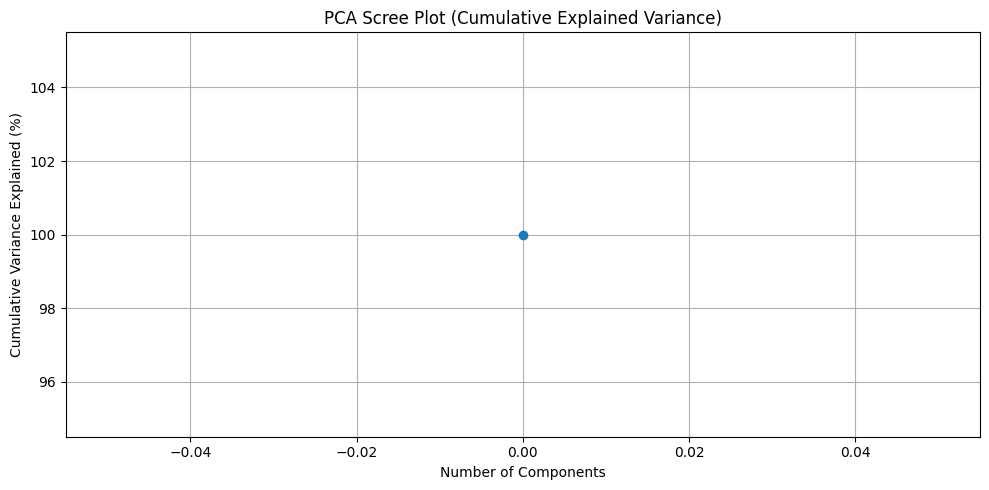

In [46]:
#PCA Scree Plot
# returns = data.pct_change().dropna()
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(explained_variance)*100, marker='o')
plt.title("PCA Scree Plot (Cumulative Explained Variance)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
#Perform Singular Value Decomposition (SVD)
#Create a second feature: Lagged returns (previous day's returns)
data['Lagged_Returns'] = data['Daily_Returns'].shift(1)

# Drop any missing values created by the lagging
data.dropna(inplace=True)

# Two Features:'Daily_Returns' and 'Lagged_Returns'
returns_data_svd = data[['Daily_Returns', 'Lagged_Returns']].values

# Apply SVD
svd = TruncatedSVD(n_components=1)
svd.fit(returns_data_svd)

# Get the singular values and components
singular_values = svd.singular_values_
components_svd = svd.components_

# Print SVD results
print(f'Singular Values: {singular_values}')
print(f'SVD Components: {components_svd}')

Singular Values: [0.15297414]
SVD Components: [[ 0.75508385 -0.65562823]]


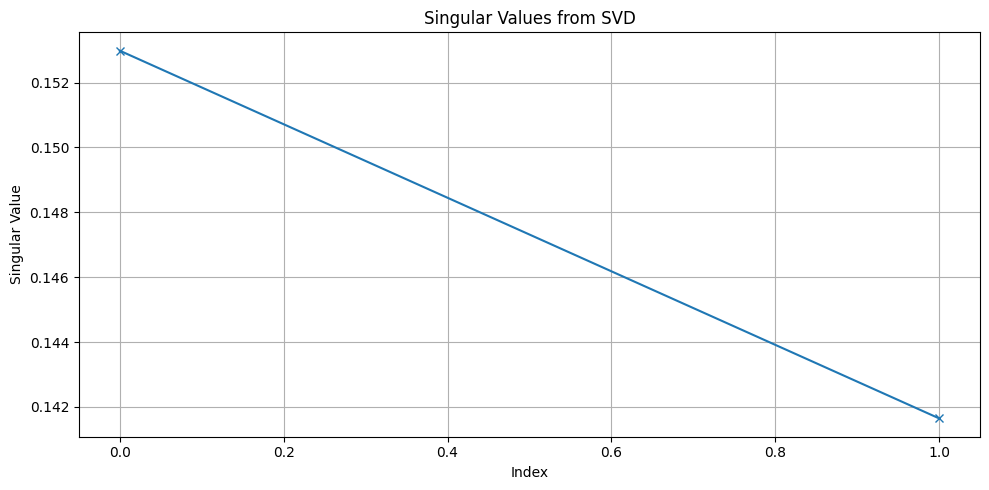

In [48]:
#SVD PLOT 
X_centered = returns_data_svd - returns_data_svd.mean()
U, S, VT = np.linalg.svd(X_centered, full_matrices=False)

plt.figure(figsize=(10,5))
plt.plot(S, marker='x')
plt.title("Singular Values from SVD")
plt.xlabel("Index")
plt.ylabel("Singular Value")
plt.grid(True)
plt.tight_layout()
plt.show()

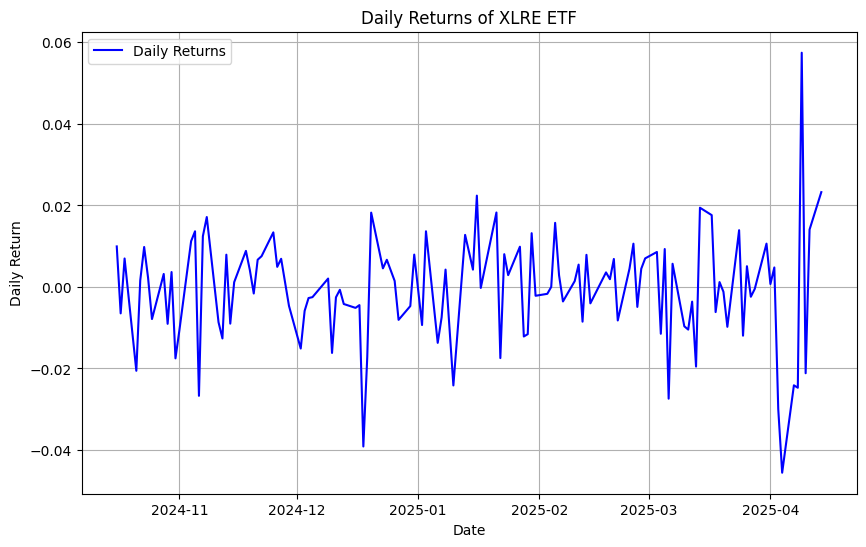

In [26]:
#Visualize the daily returns
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Daily_Returns'], label='Daily Returns', color='b')
plt.title('Daily Returns of XLRE ETF')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()